In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sympy import *
%matplotlib notebook

In [2]:
def plot(domain, x_, funcs):
    plt.figure()
    plt.grid()
    plt.ylim(-10,10)
    x = np.linspace(domain[0], domain[1], 100)
    
    for func in funcs:
        f = lambdify(x_, func, modules=['numpy'])
        y = f(x)
        plt.plot(x, y, '-')
        
    plt.show()

In [25]:
def taylor(function, x, a, n=2):
    """ Get a quadratic approximation by using 2 terms of Taylor series.
        .subs() method substitutes the x or y by a real number. """
    i = 1
    q = function.subs(x, a)
    # print(q)
    while i <= n:
        function = function.diff()
        q += function.subs(x,a)*((x-a)**i/np.math.factorial(i))
        # ((function.diff(x_sym,i).subs(x,x0))*(x-x0)**i) / (np.math.factorial(i))
        # print(q)
        i += 1
    return q

<IPython.core.display.Javascript object>


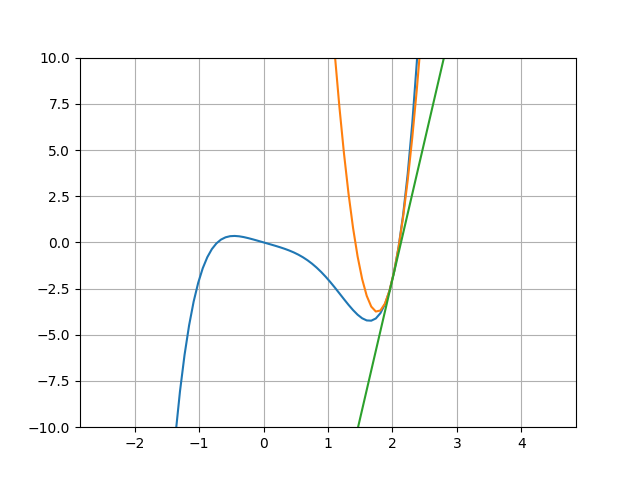

In [26]:
# Test
x = Symbol('x')
y = x**5-2*x**4-x
z = taylor(y, x, 2)
w = 15*x - 32

plot([-2.5,4.5], x, [y, z, w])

In [27]:
z = Poly(z)
print(z)
a,b,c = z.coeffs()
print(a,b,c)
v = -b/(2*a)
print(v)
float(z.subs(x,v))

Poly(32*x**2 - 113*x + 96, x, domain='ZZ')
32 -113 96
113/64


-3.7578125

In [114]:
# START COMPARISON BETWEEN GRADIENT DESCENT & NEWTON-RAPSOD
p = 150
x = Symbol('x')
y = (1/4)*x**4-1.5*x**2-x
his = []

In [112]:
while -4 < y.subs(x,p):
    print("Iteration: {0}".format(len(his)+1))
    print("Function f(x) @: x={0}, y={1}".format(p, float(y.subs(x,p))))
    z = Poly(taylor(y, x, p))
    print("Approximated 2-degree poly @ {0}".format(z))
    a,b,c = z.coeffs()
    v = float(-b/(2*a))
    print("Vertex @ x={0}, approx y={1}, real y={2}".format(v, float(z.subs(x,v)), float(y.subs(x,v))))
    print()
    p = v
    his.append([p, float(z.subs(x,v)), float(y.subs(x,v))])

Iteration: 1
Function f(x) @: x=150, y=126528600.0
Approximated 2-degree poly @ Poly(33748.5*x**2 - 6750001.0*x + 379687500.0, x, domain='RR')
Vertex @ x=100.00445945745737, approx y=42172399.32885164, real y=24989358.413441133

Iteration: 2
Function f(x) @: x=100.00445945745737, y=24989358.413441133
Approximated 2-degree poly @ Poly(14999.8378670674*x**2 - 2000268.57937968*x + 75013379.267303, x, domain='RR')
Vertex @ x=66.67634000802545, approx y=8328085.314258307, real y=4934403.126224282

Iteration: 3
Function f(x) @: x=66.67634000802545, y=4934403.126224282
Approximated 2-degree poly @ Poly(6667.10147529872*x**2 - 592851.585793384*x + 14823415.2121188, x, domain='RR')
Vertex @ x=44.46096913252851, approx y=1644037.184053667, real y=973902.966489727

Iteration: 4
Function f(x) @: x=44.46096913252851, y=973902.966489727
Approximated 2-degree poly @ Poly(2963.66666430548*x**2 - 175779.911379318*x + 2930737.78236949, x, domain='RR')
Vertex @ x=29.655816812399696, approx y=324289.35678

<IPython.core.display.Javascript object>


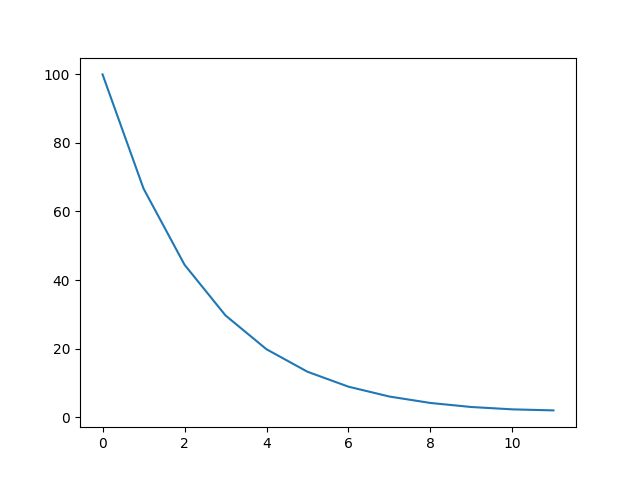

<IPython.core.display.Javascript object>


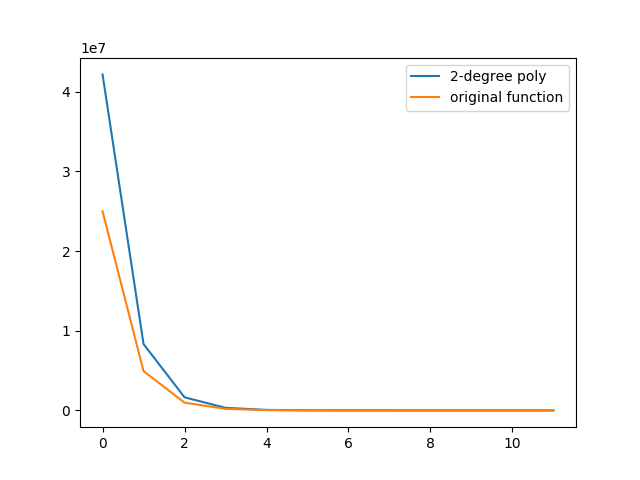

In [113]:
plt.figure()
plt.plot(np.array(his)[:, 0])
plt.show()

plt.figure()
# 2-degree poly
plt.plot(np.array(his)[:, 1])
# original function
plt.plot(np.array(his)[:, 2])
plt.legend(['2-degree poly', 'original function'])
plt.show()

In [142]:
def gradient_descent(function, x, a, alpha=1):
    da = float(function.diff().subs(x,a))
    print(function.diff())
    print(function.diff().subs(x,a))
    print("da:", da)
    return a-alpha*(np.sign(a)*np.sqrt(abs(a)))

In [143]:
# START COMPARISON BETWEEN GRADIENT DESCENT & NEWTON-RAPSOD
p_ = 150
x_ = Symbol('x')
y_ = (1/4)*x**4-1.5*x**2-x
his_ = []

In [144]:
for i in range(30):
    print("Iteration: {0}".format(len(his_)+1))
    print("Function f(x) @: x={0}, y={1}".format(p_, float(y.subs(x_,p_))))
    a = gradient_descent(y_, x_, p_)
    print("Old x={0}. New x={1}".format(p_,a))
    print("Value y={0}".format(float(y.subs(x_,a))))
    print()
    p_ = a
    his_.append([p_, float(y.subs(x_,a)), abs(y.subs(x_,a)+4.245)])

Iteration: 1
Function f(x) @: x=150, y=126528600.0
1.0*x**3 - 3.0*x - 1
3374549.00000000
da: 3374549.0
Old x=150. New x=137.7525512860841
Value y=89991316.59384072

Iteration: 2
Function f(x) @: x=137.7525512860841, y=89991316.59384072
1.0*x**3 - 3.0*x - 1
2613545.83684973
da: 2613545.836849731
Old x=137.7525512860841. New x=126.0157480038405
Value y=63019405.866420195

Iteration: 3
Function f(x) @: x=126.0157480038405, y=63019405.866420195
1.0*x**3 - 3.0*x - 1
2000747.09243067
da: 2000747.0924306684
Old x=126.0157480038405. New x=114.79007439359151
Value y=43386878.862143114

Iteration: 4
Function f(x) @: x=114.79007439359151, y=43386878.862143114
1.0*x**3 - 3.0*x - 1
1512216.02581368
da: 1512216.0258136792
Old x=114.79007439359151. New x=104.076061401552
Value y=29315764.823575668

Iteration: 5
Function f(x) @: x=104.076061401552, y=29315764.823575668
1.0*x**3 - 3.0*x - 1
1127020.61763848
da: 1127020.6176384795
Old x=104.076061401552. New x=93.8742938389405
Value y=19401211.278626584

<IPython.core.display.Javascript object>


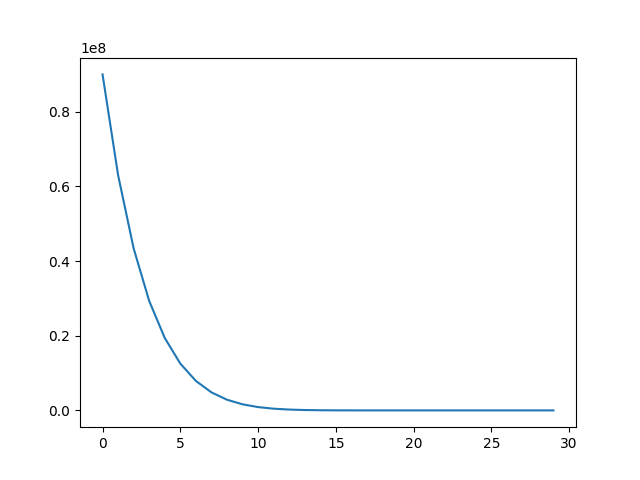

In [145]:
h_ = np.array(his_)
# print(h_[:, -1])
plt.figure()
plt.plot(h_[:, -1])
plt.show()